In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import ast

import cufflinks as cf

from plotly.offline import iplot, init_notebook_mode, plot, download_plotlyjs

init_notebook_mode(connected=True)

cf.go_offline()

In [2]:
#####################################
# Load data 
#####################################
# Read
df = pd.read_csv('extractions/extraction_2020-11-03.csv', dtype={'propertyCode':str})
# Create desired variables 
df['type'] = df['detailedType'].map(lambda x: dict(ast.literal_eval(x))['typology'])

df['parkingSpace'] = df['parkingSpace'].fillna('''{'hasParkingSpace': False, 'isParkingSpaceIncludedInPrice': False}''')
df['hasParkingSpace'] = df['parkingSpace'].map(lambda x: dict(ast.literal_eval(x))['hasParkingSpace'])
df['isParkingSpaceIncludedInPrice'] = df['parkingSpace'].map(lambda x: dict(ast.literal_eval(x))['isParkingSpaceIncludedInPrice'])

'''
TODO: Features that could be computed in the future: 
- Distance in feature space from nearest neighbours from longitude and latitude

'''

# Drop unneeded variables
drop_cols = ['Unnamed: 0', 'index', 'address', 'country','detailedType','distance','externalReference','latitude','longitude','municipality','province','suggestedTexts','thumbnail','url','operation','parkingSpace','type']
df.drop(columns=drop_cols, inplace=True)

# Drop duplicate index and keep propertycode as index
df.drop_duplicates(inplace=True)
df = df.set_index('propertyCode')

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
bathrooms,929,NaN,NaN,NaN,1.08288,0.283562,1,1,1,1,3
district,929,8,Centro,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exterior,929,2,True,472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor,890,14,bj,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has360,929,2,False,817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has3DTour,929,2,False,858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hasLift,922,2,True,621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hasPlan,929,2,True,568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hasStaging,929,2,False,928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hasVideo,929,2,False,680,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df[(df.price < 140000)].sort_values(by='priceByArea')

,bathrooms,district,exterior,floor,has360,has3DTour,hasLift,hasPlan,hasStaging,hasVideo,...,price,priceByArea,propertyType,rooms,showAddress,size,status,topNewDevelopment,hasParkingSpace,isParkingSpaceIncludedInPrice
propertyCode,,,,,,,,,,,,,,,,,,,,,
90760228,1,Tetuán,True,1,False,False,False,False,False,False,...,125000.0,2404.0,flat,1,True,52.0,good,False,False,False
90247950,1,Centro,False,2,False,False,True,True,False,False,...,120000.0,2791.0,flat,2,False,43.0,renew,False,False,False
91594062,1,Tetuán,True,bj,False,False,False,False,False,False,...,115000.0,2875.0,flat,1,False,40.0,good,False,False,False
82424324,1,Tetuán,True,1,False,False,False,False,False,False,...,125000.0,2907.0,flat,2,True,43.0,good,False,False,False
91383026,1,Tetuán,False,NaN,False,False,False,False,False,False,...,120000.0,2927.0,flat,2,False,41.0,NaN,False,False,False
91223783,1,Tetuán,False,NaN,False,False,False,False,False,False,...,104000.0,2971.0,flat,1,False,35.0,good,False,False,False
91165622,1,Tetuán,True,bj,False,False,False,True,False,False,...,137000.0,2978.0,flat,1,False,46.0,good,False,False,False
90781434,1,Tetuán,True,bj,True,False,False,True,False,False,...,129900.0,3021.0,flat,1,False,43.0,renew,False,False,False
90072233,1,Tetuán,False,2,False,False,False,True,False,True,...,130500.0,3035.0,flat,2,False,43.0,good,False,False,False


In [4]:
df.groupby('neighborhood').agg({'priceByArea':'median'}).sort_values(by='priceByArea').iplot(kind='bar')

In [5]:
df[df['size'] < 100000].iplot(x='size', y='priceByArea', mode='markers')

In [6]:
df[df['size'] < 100000].iplot(x='size', y='price', mode='markers')

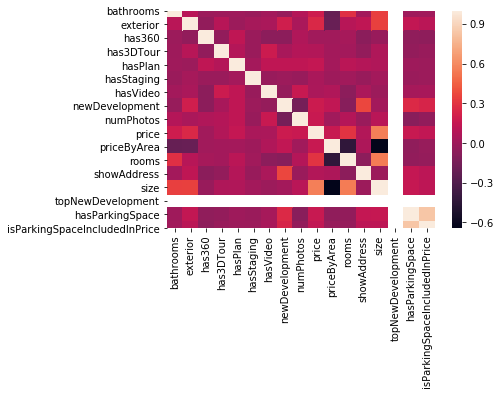

In [7]:
corr = df.corr()

sns.heatmap(corr)

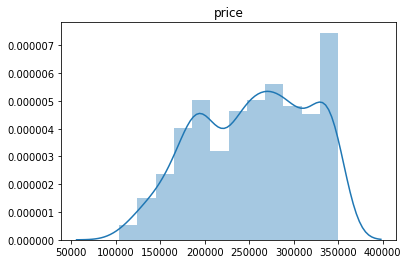

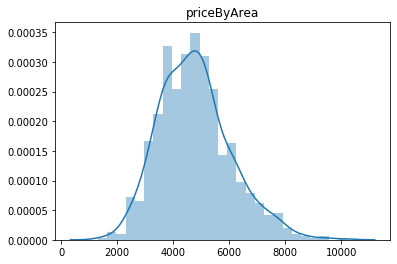

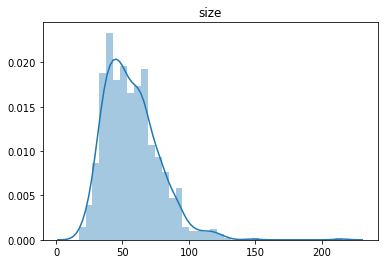

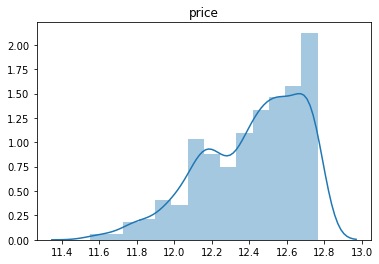

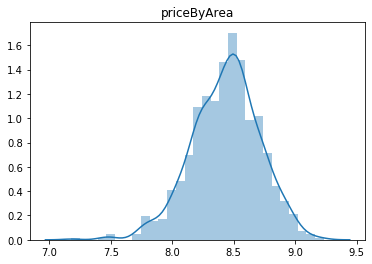

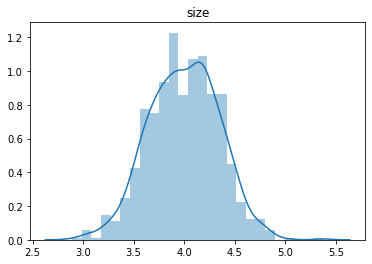

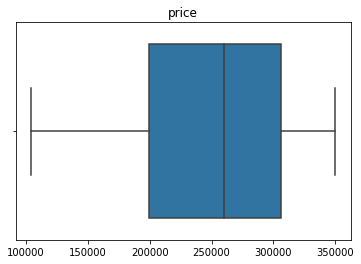

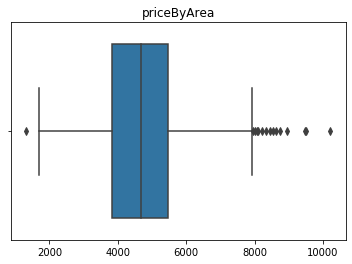

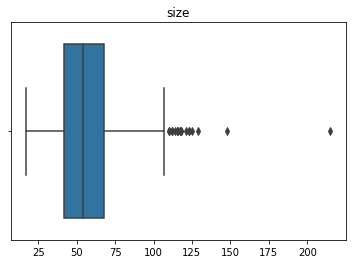

In [8]:
for c in df.columns[df.dtypes == 'float']:
    plt.title(c)
    sns.distplot(df[c].values)
    plt.show()

for c in df.columns[df.dtypes == 'float']:
    plt.title(c)
    sns.distplot(np.log(df[c].values + 1))
    plt.show()

for c in df.columns[df.dtypes == 'float']:
    plt.title(c)
    sns.boxplot(df[c].values)
    plt.show()
